### Introduction

Compare different states in terms of how they are doing against each other, with COVID cases and deaths,and comparing specific state counties.
Below we begin to extrpolate all the data we can, and develop a coherent understanding of what is actually happening. Generate our data for new cases involving confirmed and death for a specfic state. This specific state displayed below is Colorado (CO). We are using the .csv we created earlier that compiled all data concerning the new data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_population = pd.read_csv("data/covid_county_population_usafacts.csv")
covid_data = pd.read_csv("data/covid_comprehensive.csv")

df_CO = covid_data.loc[covid_data["StateFIPS"] == 8]
df_CO_deaths = df_CO[df_CO.columns.drop(list(df_CO.filter(regex=r'(confirmed|deaths|(Confirmed))')))]
df_CO_confirmed = df_CO[df_CO.columns.drop(list(df_CO.filter(regex=r'(confirmed|deaths|(Deaths))')))]

def get_median_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Sum | Mean | Mode )')))]
def get_sum_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Mean | Mode | Median )')))]
def get_mode_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Mean | Median | Sum )')))]
def get_mean_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Mode | Sum | Median )')))]

df_CO_deaths_state = df_CO_deaths.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS'], axis=1).reset_index()
df_CO_confirmed_state = df_CO_confirmed.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS'], axis=1).reset_index()

Below are the statistics statewide per week concerning new deaths and new confirmed cases:

In [3]:
display(df_CO_confirmed_state)
display(df_CO_deaths_state)

,State,2022-06-01 - 2022-06-08 Sum (Confirmed),2022-06-01 - 2022-06-08 Mean (Confirmed),2022-06-01 - 2022-06-08 Median (Confirmed),2022-06-01 - 2022-06-08 Mode (Confirmed),2022-06-08 - 2022-06-15 Sum (Confirmed),2022-06-08 - 2022-06-15 Mean (Confirmed),2022-06-08 - 2022-06-15 Median (Confirmed),2022-06-08 - 2022-06-15 Mode (Confirmed),2022-06-15 - 2022-06-22 Sum (Confirmed),...,2022-12-14 - 2022-12-21 Mode (Confirmed),2022-12-21 - 2022-12-28 Sum (Confirmed),2022-12-21 - 2022-12-28 Mean (Confirmed),2022-12-21 - 2022-12-28 Median (Confirmed),2022-12-21 - 2022-12-28 Mode (Confirmed),2022-12-28 - 2022-12-31 Sum (Confirmed),2022-12-28 - 2022-12-31 Mean (Confirmed),2022-12-28 - 2022-12-31 Median (Confirmed),2022-12-28 - 2022-12-31 Mode (Confirmed),population
0,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,77137,...,0.0,0,0.0,0.0,0.0,11240,3746.0,0.0,0.0,5758736


,State,2022-06-01 - 2022-06-08 Sum (Deaths),2022-06-01 - 2022-06-08 Mean (Deaths),2022-06-01 - 2022-06-08 Median (Deaths),2022-06-01 - 2022-06-08 Mode (Deaths),2022-06-08 - 2022-06-15 Sum (Deaths),2022-06-08 - 2022-06-15 Mean (Deaths),2022-06-08 - 2022-06-15 Median (Deaths),2022-06-08 - 2022-06-15 Mode (Deaths),2022-06-15 - 2022-06-22 Sum (Deaths),...,2022-12-14 - 2022-12-21 Mode (Deaths),2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths),population
0,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,165,...,0,0,0.0,0.0,0,111,36.0,0.0,0.0,5758736


Plotting the results of our data:

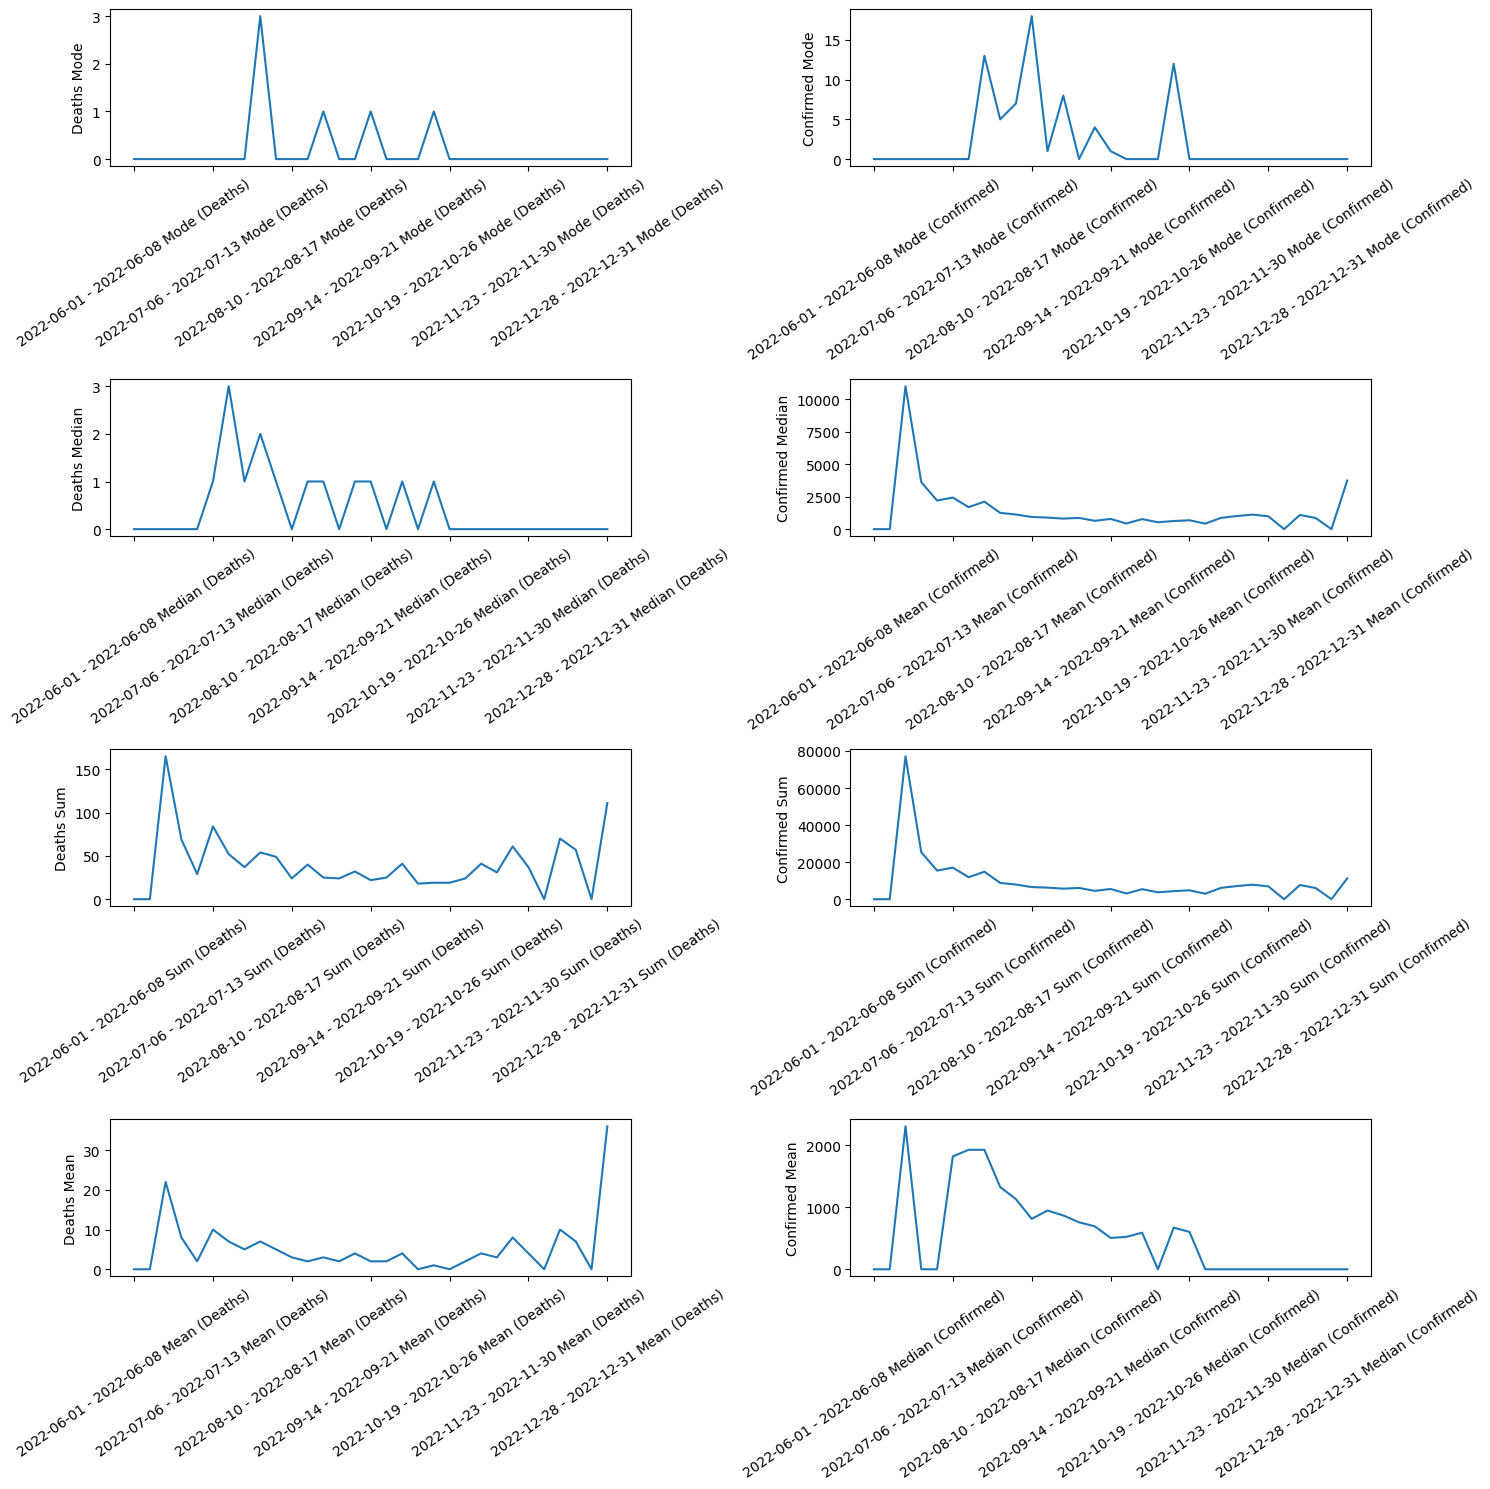

In [4]:
### Confirmed Modes, Sums, Means, and Medians to use ###

df_CO_deaths_mode = get_mode_data(df_CO_deaths_state.drop(['State', 'population'], axis=1))
df_CO_deaths_mean = get_mean_data(df_CO_deaths_state.drop(['State', 'population'], axis=1))
df_CO_deaths_sum = get_sum_data(df_CO_deaths_state.drop(['State', 'population'], axis=1))
df_CO_deaths_median = get_median_data(df_CO_deaths_state.drop(['State', 'population'], axis=1))

### Confirmed Modes, Sums, Means, and Medians to use ###

df_CO_confirmed_mode = get_mode_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))
df_CO_confirmed_mean = get_mean_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))
df_CO_confirmed_sum = get_sum_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))
df_CO_confirmed_median = get_median_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))

fig, ax = plt.subplots(4, 2, figsize=(15, 15))
ax[0,0].set_ylabel('Deaths Mode')
ax[1,0].set_ylabel('Deaths Median')
ax[2,0].set_ylabel('Deaths Sum')
ax[3,0].set_ylabel('Deaths Mean')

ax[0,1].set_ylabel('Confirmed Mode')
ax[1,1].set_ylabel('Confirmed Median')
ax[2,1].set_ylabel('Confirmed Sum')
ax[3,1].set_ylabel('Confirmed Mean')


df_CO_deaths_mode.iloc[0].plot(kind="line", ax = ax[0,0])
df_CO_deaths_mean.iloc[0].plot(kind="line", ax = ax[3,0])
df_CO_deaths_sum.iloc[0].plot(kind="line", ax = ax[2,0])
df_CO_deaths_median.iloc[0].plot(kind="line", ax = ax[1,0])


df_CO_confirmed_mode.iloc[0].plot(kind="line", ax = ax[0,1])
df_CO_confirmed_mean.iloc[0].plot(kind="line", ax = ax[1,1])
df_CO_confirmed_sum.iloc[0].plot(kind="line", ax = ax[2,1])
df_CO_confirmed_median.iloc[0].plot(kind="line", ax = ax[3,1])

for x in ax .flatten():
    plt.sca(x)
    plt.xticks(rotation = 35)

plt.tight_layout()    

plt.show()


It is interesting to note that there are more spikes during holidays, for example summer vacations or the start of Christmas. This is based on one state though, but I believe that same can be said for others. Furthermore, there may be dips in the data due to reporting delays or human error. Either way the data showcases a good estimation of what an average year with a highly transmissable disease can do.

Below are the statistics per county each week.

In [5]:
display(df_CO_confirmed.drop(['countyFIPS', 'StateFIPS'], axis=1))
display(df_CO_deaths.drop(['countyFIPS', 'StateFIPS'], axis=1))

,County Name,State,2022-06-01 - 2022-06-08 Sum (Confirmed),2022-06-01 - 2022-06-08 Mean (Confirmed),2022-06-01 - 2022-06-08 Median (Confirmed),2022-06-01 - 2022-06-08 Mode (Confirmed),2022-06-08 - 2022-06-15 Sum (Confirmed),2022-06-08 - 2022-06-15 Mean (Confirmed),2022-06-08 - 2022-06-15 Median (Confirmed),2022-06-08 - 2022-06-15 Mode (Confirmed),...,2022-12-14 - 2022-12-21 Mode (Confirmed),2022-12-21 - 2022-12-28 Sum (Confirmed),2022-12-21 - 2022-12-28 Mean (Confirmed),2022-12-21 - 2022-12-28 Median (Confirmed),2022-12-21 - 2022-12-28 Mode (Confirmed),2022-12-28 - 2022-12-31 Sum (Confirmed),2022-12-28 - 2022-12-31 Mean (Confirmed),2022-12-28 - 2022-12-31 Median (Confirmed),2022-12-28 - 2022-12-31 Mode (Confirmed),population
244,Adams County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,908,303.0,0.0,0.0,517421
245,Alamosa County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,36,12.0,0.0,0.0,16233
246,Arapahoe County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,1398,466.0,0.0,0.0,656590
247,Archuleta County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,14029
248,Baca County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,4,1.0,0.0,0.0,3581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Summit County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,67,22.0,0.0,0.0,31011
304,Teller County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,33,11.0,0.0,0.0,25388
305,Washington County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,4908
306,Weld County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,324492


,County Name,State,2022-06-01 - 2022-06-08 Sum (Deaths),2022-06-01 - 2022-06-08 Mean (Deaths),2022-06-01 - 2022-06-08 Median (Deaths),2022-06-01 - 2022-06-08 Mode (Deaths),2022-06-08 - 2022-06-15 Sum (Deaths),2022-06-08 - 2022-06-15 Mean (Deaths),2022-06-08 - 2022-06-15 Median (Deaths),2022-06-08 - 2022-06-15 Mode (Deaths),...,2022-12-14 - 2022-12-21 Mode (Deaths),2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths),population
244,Adams County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,12,4.0,0.0,0.0,517421
245,Alamosa County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,2,1.0,0.0,0.0,16233
246,Arapahoe County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,8,3.0,0.0,0.0,656590
247,Archuleta County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,14029
248,Baca County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,3581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Summit County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,31011
304,Teller County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,2,1.0,0.0,0.0,25388
305,Washington County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,4908
306,Weld County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,324492


### Comparing States

In the code below we compare our data against three other states. These states are NC, VA, and AL.
It is important to 'clean' our data, below I strip out all strings and any columns that are not of us for this analysis. The main focus is to determine how each state stacks against the other in terms of new deaths and confirmed cases. 

,2022-06-01 - 2022-06-08 Sum (Deaths),2022-06-01 - 2022-06-08 Mean (Deaths),2022-06-01 - 2022-06-08 Median (Deaths),2022-06-01 - 2022-06-08 Mode (Deaths),2022-06-08 - 2022-06-15 Sum (Deaths),2022-06-08 - 2022-06-15 Mean (Deaths),2022-06-08 - 2022-06-15 Median (Deaths),2022-06-08 - 2022-06-15 Mode (Deaths),2022-06-15 - 2022-06-22 Sum (Deaths),2022-06-15 - 2022-06-22 Mean (Deaths),...,2022-12-14 - 2022-12-21 Median (Deaths),2022-12-14 - 2022-12-21 Mode (Deaths),2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths)
0,0.008581,0.0,0.0,0.0,0.420477,0.051487,0.0,0.0,0.043859,0.003814,...,0.0,0.0,0.04672,0.001907,0.0,0.0,0.0,0.0,0.0,0.0


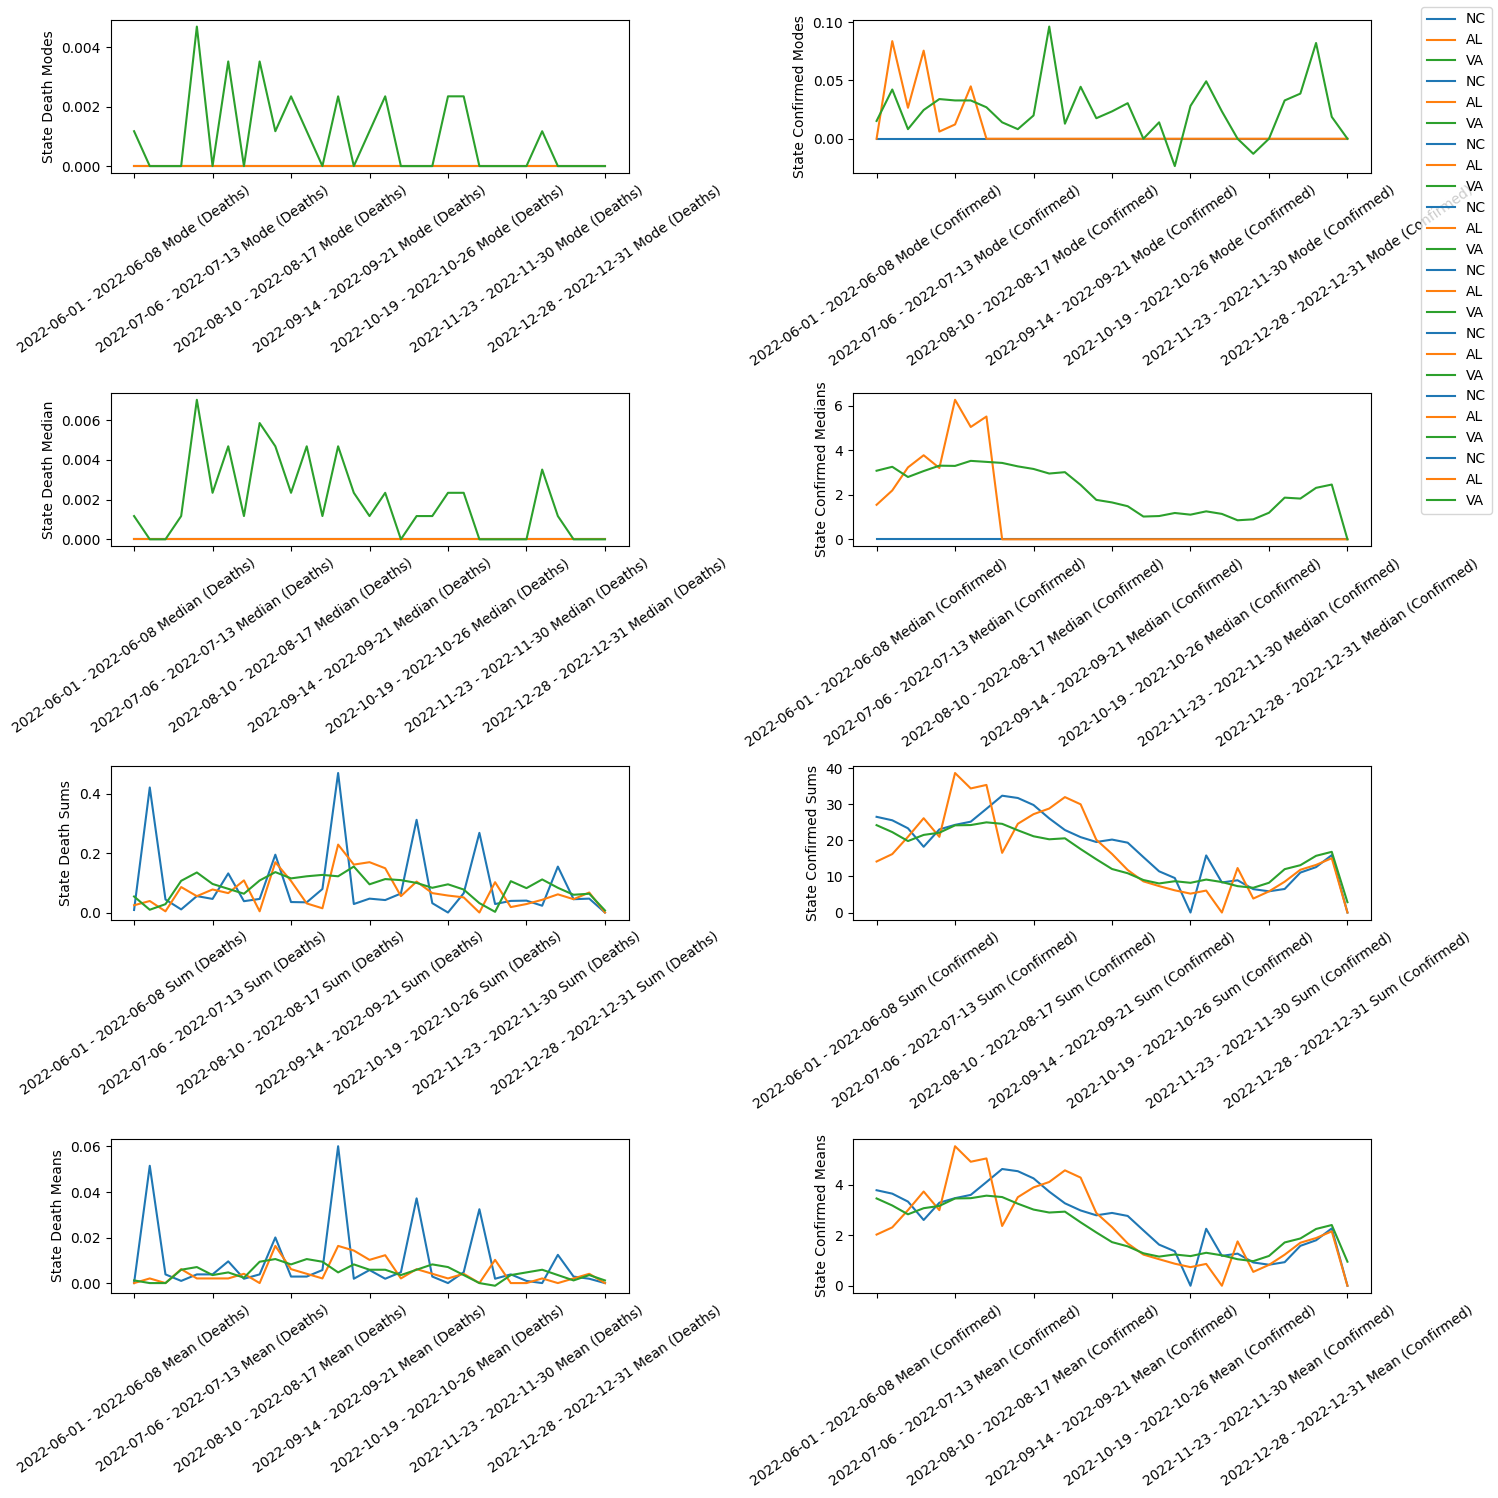

In [6]:

#Helper functions

FACTOR = 10000
STATES = ["NC", "AL", "VA"]

covid_population.drop(covid_population[covid_population["County Name"].str.contains("Statewide")==True].index, inplace=True)
population_state = covid_population.drop(['countyFIPS', 'County Name'], axis=1).groupby("State").sum()

def get_new_deaths(df): 
    return df[df.columns.drop(list(df.filter(regex=r'(confirmed|deaths|(Confirmed))')))]

def get_new_confirmed(df):
    return df[df.columns.drop(list(df.filter(regex=r'(confirmed|deaths|(Deaths))')))]

def normalize(df, population):
    return (df/population) * FACTOR
#Get our three states

df_NC = covid_data.loc[covid_data["StateFIPS"] == 37]
df_AL = covid_data.loc[covid_data["StateFIPS"] == 1]
df_VA = covid_data.loc[covid_data["StateFIPS"] == 51]

df_NC = df_NC.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS', 'population'], axis=1).reset_index()
df_AL = df_AL.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS', 'population'], axis=1).reset_index()
df_VA = df_VA.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS', 'population'], axis=1).reset_index()


#Get our new data and normalize it 
df_NC_deaths = normalize(get_new_deaths(df_NC.drop(['State'], axis=1)), population_state.loc[STATES[0]]['population'])
df_AL_deaths = normalize(get_new_deaths(df_AL.drop(['State'], axis=1)), population_state.loc[STATES[1]]['population'])
df_VA_deaths = normalize(get_new_deaths(df_VA.drop(['State'], axis=1)), population_state.loc[STATES[2]]['population'])

df_NC_confirmed = normalize(get_new_confirmed(df_NC.drop(['State'], axis=1)), population_state.loc[STATES[0]]['population'])
df_AL_confirmed = normalize(get_new_confirmed(df_AL.drop(['State'], axis=1)), population_state.loc[STATES[1]]['population'])
df_VA_confirmed = normalize(get_new_confirmed(df_VA.drop(['State'], axis=1)), population_state.loc[STATES[2]]['population'])

### Deaths Modes, Sums, Means, and Medians to use ###

df_NC_deaths_mode = get_mode_data(df_NC_deaths)
df_NC_deaths_mean = get_mean_data(df_NC_deaths)
df_NC_deaths_sum = get_sum_data(df_NC_deaths)
df_NC_deaths_median = get_median_data(df_NC_deaths)

df_AL_deaths_mode = get_mode_data(df_AL_deaths)
df_AL_deaths_mean = get_mean_data(df_AL_deaths)
df_AL_deaths_sum = get_sum_data(df_AL_deaths)
df_AL_deaths_median = get_median_data(df_AL_deaths)

df_VA_deaths_mode = get_mode_data(df_VA_deaths)
df_VA_deaths_mean = get_mean_data(df_VA_deaths)
df_VA_deaths_sum = get_sum_data(df_VA_deaths)
df_VA_deaths_median = get_median_data(df_VA_deaths)
 
### Confirmed Modes, Sums, Means, and Medians to use ###

df_NC_confirmed_mode = get_mode_data(df_NC_confirmed)
df_NC_confirmed_mean = get_mean_data(df_NC_confirmed)
df_NC_confirmed_sum = get_sum_data(df_NC_confirmed)
df_NC_confirmed_median = get_median_data(df_NC_confirmed)

df_AL_confirmed_mode = get_mode_data(df_AL_confirmed)
df_AL_confirmed_mean = get_mean_data(df_AL_confirmed)
df_AL_confirmed_sum = get_sum_data(df_AL_confirmed)
df_AL_confirmed_median = get_median_data(df_AL_confirmed)

df_VA_confirmed_mode = get_mode_data(df_VA_confirmed)
df_VA_confirmed_mean = get_mean_data(df_VA_confirmed)
df_VA_confirmed_sum = get_sum_data(df_VA_confirmed)
df_VA_confirmed_median = get_median_data(df_VA_confirmed)


#Plot our data

fig, ax = plt.subplots(4, 2, figsize=(15, 15))
ax[0,0].set_ylabel('State Death Modes')
ax[1,0].set_ylabel('State Death Median')
ax[2,0].set_ylabel('State Death Sums')
ax[3,0].set_ylabel('State Death Means')

ax[0,1].set_ylabel('State Confirmed Modes')
ax[1,1].set_ylabel('State Confirmed Medians')
ax[2,1].set_ylabel('State Confirmed Sums')
ax[3,1].set_ylabel('State Confirmed Means')


df_NC_deaths_mode.iloc[0].plot(kind="line", ax = ax[0,0], label='NC')
df_AL_deaths_mode.iloc[0].plot(kind="line", ax = ax[0,0], label='AL')
df_VA_deaths_mode.iloc[0].plot(kind="line", ax = ax[0,0], label='VA')

df_NC_deaths_median.iloc[0].plot(kind="line", ax = ax[1,0], label='NC')
df_AL_deaths_median.iloc[0].plot(kind="line", ax = ax[1,0], label='AL')
df_VA_deaths_median.iloc[0].plot(kind="line", ax = ax[1,0], label='VA')

df_NC_deaths_sum.iloc[0].plot(kind="line", ax = ax[2,0], label='NC')
df_AL_deaths_sum.iloc[0].plot(kind="line", ax = ax[2,0], label='AL')
df_VA_deaths_sum.iloc[0].plot(kind="line", ax = ax[2,0], label='VA')

df_NC_deaths_mean.iloc[0].plot(kind="line", ax = ax[3,0], label='NC')
df_AL_deaths_mean.iloc[0].plot(kind="line", ax = ax[3,0], label='AL')
df_VA_deaths_mean.iloc[0].plot(kind="line", ax = ax[3,0], label='VA')

#################


df_NC_confirmed_mode.iloc[0].plot(kind="line", ax = ax[0,1], label='NC')
df_AL_confirmed_mode.iloc[0].plot(kind="line", ax = ax[0,1], label='AL')
df_VA_confirmed_mode.iloc[0].plot(kind="line", ax = ax[0,1], label='VA')

df_NC_confirmed_median.iloc[0].plot(kind="line", ax = ax[1,1], label='NC')
df_AL_confirmed_median.iloc[0].plot(kind="line", ax = ax[1,1], label='AL')
df_VA_confirmed_median.iloc[0].plot(kind="line", ax = ax[1,1], label='VA')

df_NC_confirmed_sum.iloc[0].plot(kind="line", ax = ax[2,1], label='NC')
df_AL_confirmed_sum.iloc[0].plot(kind="line", ax = ax[2,1], label='AL')
df_VA_confirmed_sum.iloc[0].plot(kind="line", ax = ax[2,1], label='VA')

df_NC_confirmed_mean.iloc[0].plot(kind="line", ax = ax[3,1], label='NC')
df_AL_confirmed_mean.iloc[0].plot(kind="line", ax = ax[3,1], label='AL')
df_VA_confirmed_mean.iloc[0].plot(kind="line", ax = ax[3,1], label='VA')


for x in ax .flatten():
    plt.sca(x)
    plt.xticks(rotation = 35)

fig.legend(loc="upper right")
plt.tight_layout()    
plt.show()




Sifting throught the data, there are noticable peaks and differences between the three states (NC, AL, VA). 

To start, there is noticeable 0 references in the data, that is because of either human error from the online websites, however the data has plenty to go off on. The peaks between the different states are different, but sometimes originate near the same areas. If you notice on the "State Death Means" graph, All three states, has a considerable peak at the same time. I belive this may have originated because of southern schools letting out for the summer and families go on vacations, spreading the virus and causing deaths to occur later in the summer.

The peaks were somewhat close the US pattern, but of course there are differences based on locations and places.

I belive the rates differ between each state due to human reporting based on a case by case basis. If you notice, the first two graphs have zero data to report, either people are healthier in these states...or there is erroneous reporting, which is what I believe. Further, each state has different events/social activities, so people could've contracted it earlier or later in the time. Lastly, some states could've had more strict rules on having masks/quarantine. A lot to factor in.

It is interesting to notice that NC has such a high rate of deaths... that I am not sure why. One thing could be NC's citizens' stance on COVID during this time, which was lax for the most part. 

### Counties

Below we find the three highest counties within North Carolina with high cases and death rates.

In [7]:
pop_data = pd.read_csv('data/covid_county_population_usafacts.csv')
pop_data.drop(pop_data[(pop_data["countyFIPS"] == 0)].index, inplace=True)

confirmed = pd.read_csv("data/covid_confirmed_usafacts.csv")
confirmed = confirmed.drop(confirmed.iloc[:, 4 : 864], axis=1)
confirmed = confirmed.drop(confirmed.iloc[:, 219 : 235], axis=1)

deaths = pd.read_csv("data/covid_deaths_usafacts.csv")
deaths = deaths.drop(deaths.iloc[:, 4 : 864], axis=1)
deaths = deaths.drop(deaths.iloc[:, 219 : 235], axis=1)

covid_confirmed_data = pd.merge(confirmed, pop_data, on='countyFIPS')
covid_death_data = pd.merge(deaths, pop_data, on='countyFIPS')

covid_confirmed_data.drop(covid_confirmed_data[(covid_confirmed_data['countyFIPS'] == 0)].index, inplace=True)
covid_death_data.drop(covid_death_data[(covid_death_data['countyFIPS'] == 0)].index, inplace=True)

county_NC_confirmed = covid_confirmed_data.loc[covid_confirmed_data["StateFIPS"] == 37]
county_NC_deaths = covid_death_data.loc[covid_death_data["StateFIPS"] == 37]

find_sum_confirmed = county_NC_confirmed.groupby('County Name_x').sum(numeric_only=True).drop(['StateFIPS'], axis=1).reset_index()
find_sum_deaths = county_NC_deaths.groupby('County Name_x').sum(numeric_only=True).drop(['StateFIPS'], axis=1).reset_index()

top_three_confirmed = find_sum_confirmed.sort_values(by="2022-12-31", ascending=False).head(3)
top_three_deaths = find_sum_deaths.sort_values(by="2022-12-31", ascending=False).head(3)

display(top_three_confirmed)
display(top_three_deaths)


,County Name_x,countyFIPS,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,...,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31,population
91,Wake County,37183,311960,317226,317226,317226,317226,317226,317226,317226,...,377649,377649,377649,377649,377649,377649,377649,377649,377649,1111761
59,Mecklenburg County,37119,290858,293852,293852,293852,293852,293852,293852,293852,...,352637,352637,352637,352637,352637,352637,352637,352637,352637,1110356
40,Guilford County,37081,124604,126137,126137,126137,126137,126137,126137,126137,...,152546,152546,152546,152546,152546,152546,152546,152546,152546,537174


,County Name_x,countyFIPS,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,...,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31,population
59,Mecklenburg County,37119,1622,1622,1622,1622,1622,1622,1622,1622,...,1837,1837,1837,1837,1837,1837,1837,1837,1837,1110356
40,Guilford County,37081,1212,1213,1213,1213,1213,1213,1213,1213,...,1385,1385,1385,1385,1385,1385,1385,1385,1385,537174
91,Wake County,37183,1122,1122,1122,1122,1122,1122,1122,1122,...,1289,1289,1289,1289,1289,1289,1289,1289,1289,1111761


I decided to find the top three counties in our state that had the most deaths and confirmed cases. Guildord County is ranked number three out of the entire state during this 6 month period, a bit scary...

### Weekly Trends of the Three Counties

Below I plot the weekly trends of new cases to find anything noteworthy, the results were surprising to find.

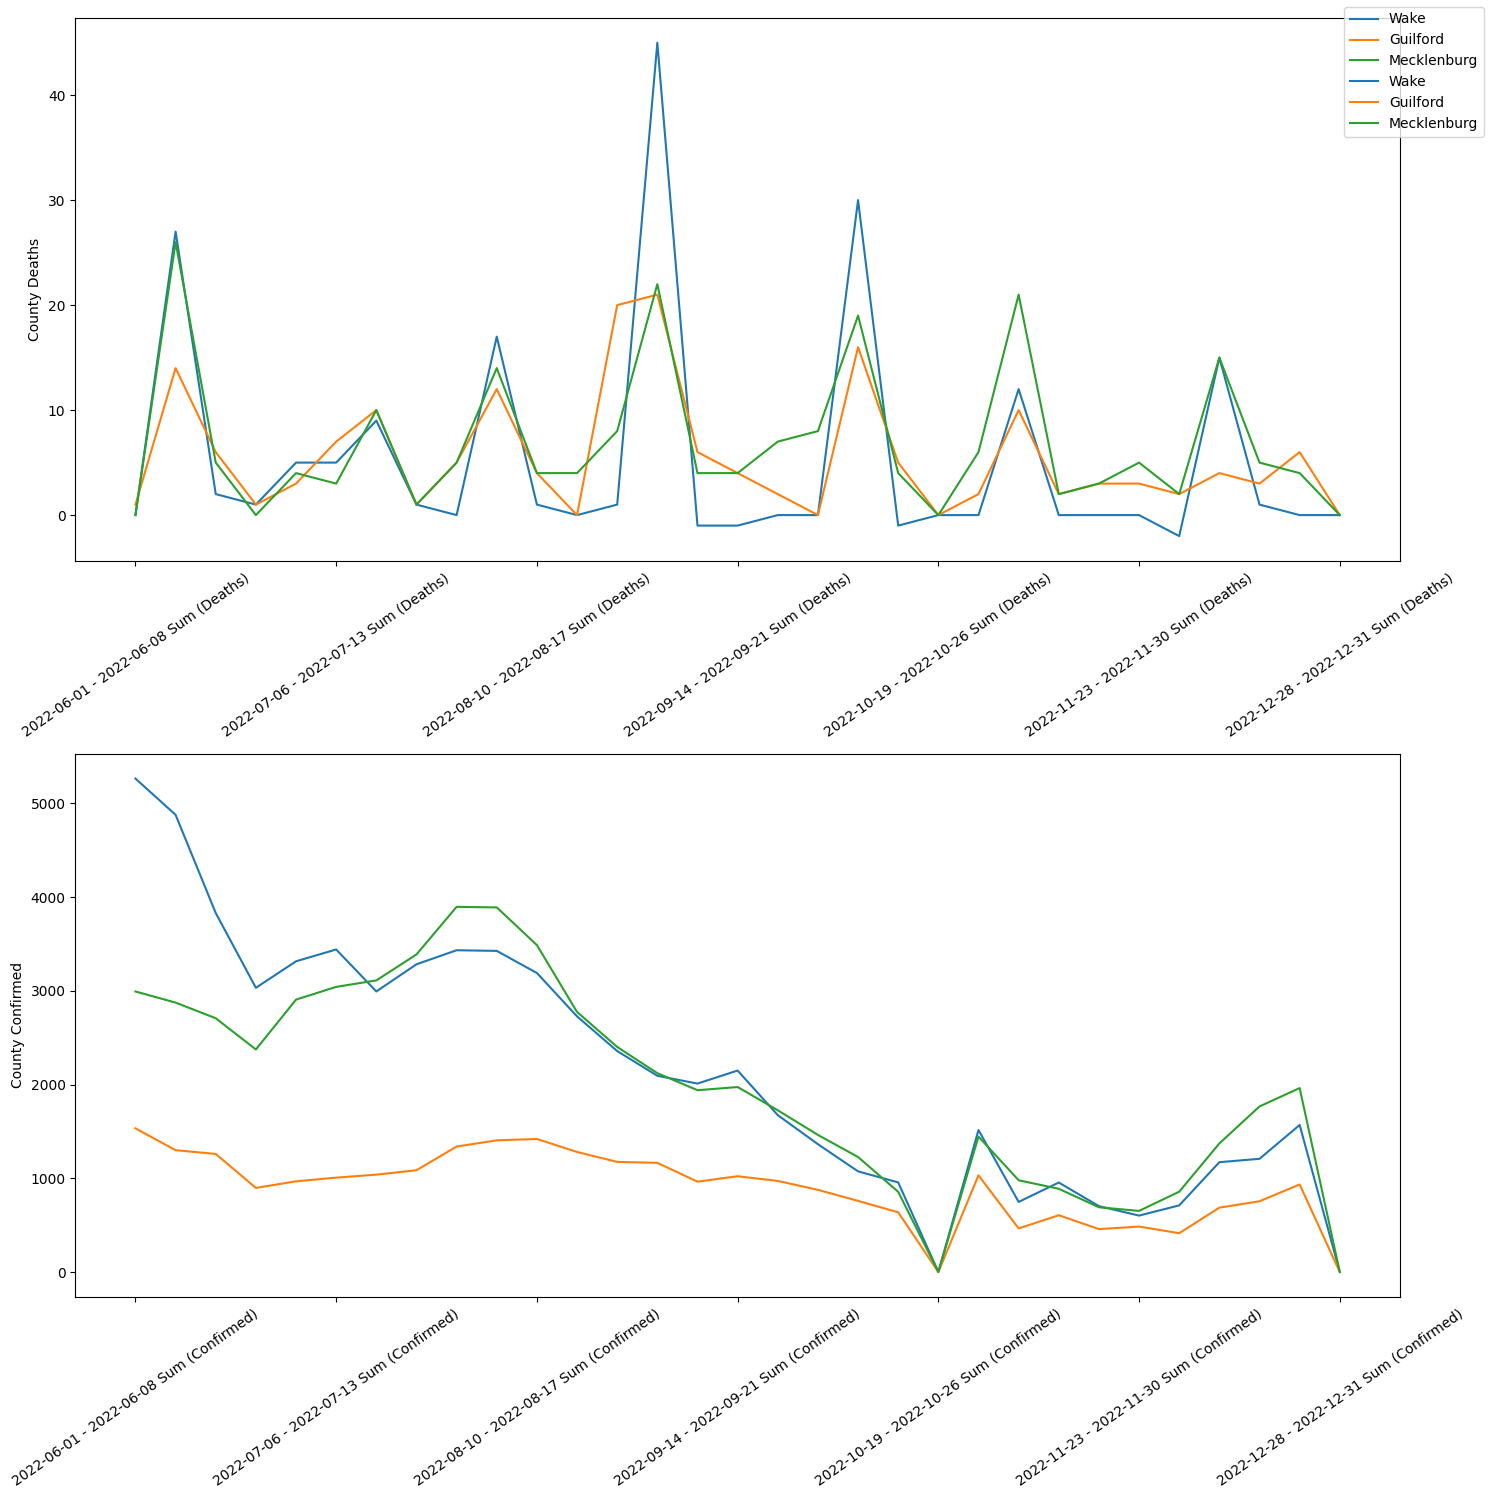

In [8]:
df_NC = covid_data.loc[covid_data["StateFIPS"] == 37]

df_NC_wake = df_NC.loc[df_NC["countyFIPS"] == 37183]
df_NC_guilford = df_NC.loc[df_NC["countyFIPS"] == 37081]
df_NC_meck = df_NC.loc[df_NC["countyFIPS"] == 37119]

df_NC_wake = df_NC_wake.reset_index()
df_NC_guilford = df_NC_guilford.reset_index()
df_NC_meck = df_NC_meck.reset_index()

#clean data
df_NC_wake = df_NC_wake.drop(['index','countyFIPS', 'State', 'County Name', 'StateFIPS', 'population'], axis=1)
df_NC_guilford = df_NC_guilford.drop(['index','countyFIPS', 'State', 'County Name', 'StateFIPS', 'population'], axis=1)
df_NC_meck = df_NC_meck.drop(['index','countyFIPS', 'State', 'County Name', 'StateFIPS', 'population'], axis=1)

df_wake_deaths = get_sum_data(get_new_deaths(df_NC_wake))
df_wake_confirmed = get_sum_data(get_new_confirmed(df_NC_wake))

df_guilford_deaths = get_sum_data(get_new_deaths(df_NC_guilford))
df_guilford_confirmed = get_sum_data(get_new_confirmed(df_NC_guilford))

df_meck_deaths = get_sum_data(get_new_deaths(df_NC_meck))
df_meck_confirmed = get_sum_data(get_new_confirmed(df_NC_meck))

fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax[0].set_ylabel('County Deaths')
ax[1].set_ylabel('County Confirmed')

df_wake_deaths.iloc[0].plot(kind="line", ax = ax[0], label='Wake')
df_guilford_deaths.iloc[0].plot(kind="line", ax = ax[0], label='Guilford')
df_meck_deaths.iloc[0].plot(kind="line", ax = ax[0], label='Mecklenburg')

df_wake_confirmed.iloc[0].plot(kind="line", ax = ax[1], label='Wake')
df_guilford_confirmed.iloc[0].plot(kind="line", ax = ax[1], label='Guilford')
df_meck_confirmed.iloc[0].plot(kind="line", ax = ax[1], label='Mecklenburg')


for x in ax .flatten():
    plt.sca(x)
    plt.xticks(rotation = 35)

fig.legend(loc="upper right")
plt.tight_layout()
plt.show()


The three different counties follow a similar trend. In each county, Wake county ended up having the largest spikes, with Mecklenburg in close second. I believe that there was a larger spike, due to schools back in session around the August time frame. 

In terms of confirmed cases, there was a decrease over the summer, but as soon as schools opened up and people began traveling again. Also, started to uptick around the holidays too. There is a uptick of confirmed cases. So it goes to show that quarantining or 'separating' does work. 

Below I utilized the log function to find any differences between the normal and non-normal of my plots.

c:\Users\warso\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\warso\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


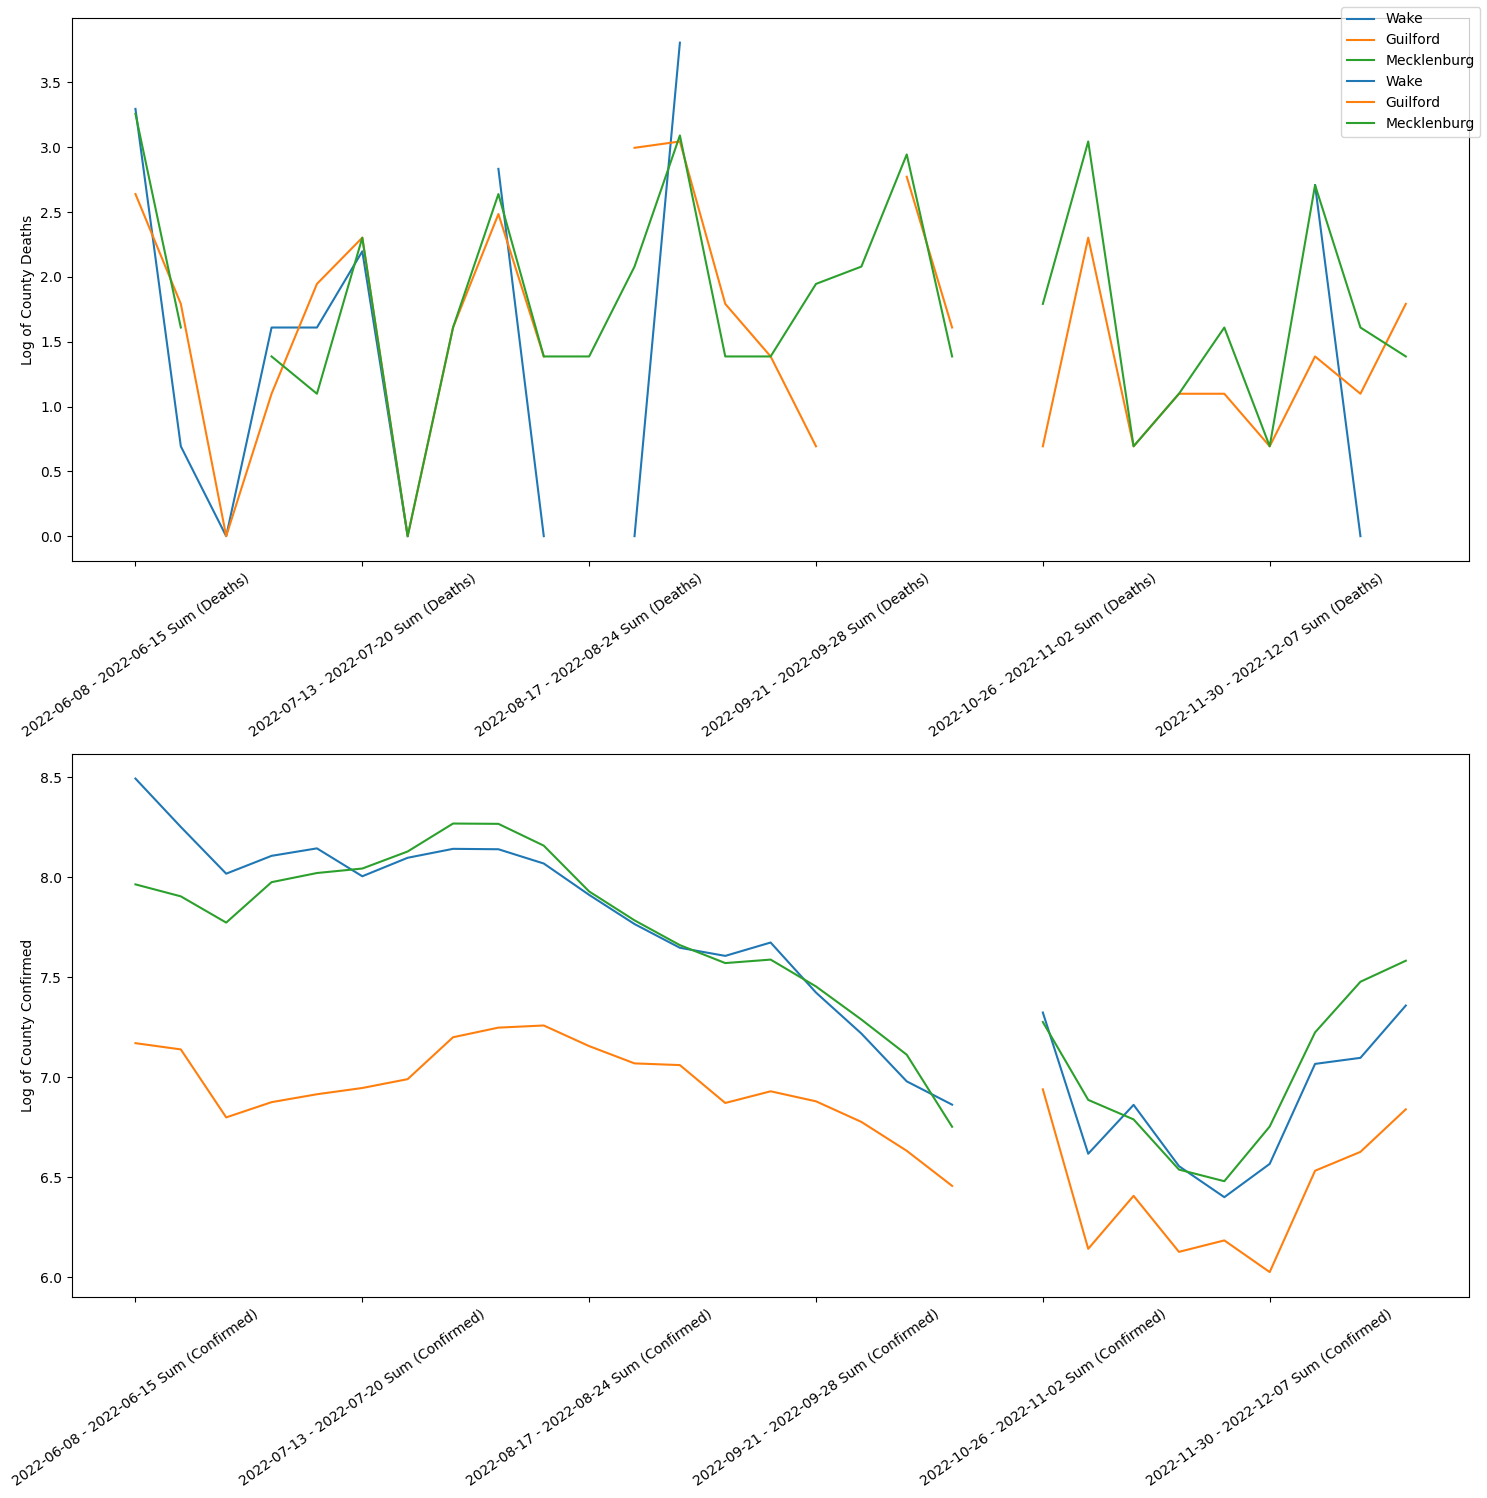

In [9]:
df_wake_deaths_log = np.log(df_wake_deaths.iloc[:, 1:])
df_guilford_deaths_log = np.log(df_guilford_deaths.iloc[:, 1:])
df_meck_deaths_log = np.log(df_meck_deaths.iloc[:, 1:])

df_wake_confirmed_log = np.log(df_wake_confirmed.iloc[:, 1:])
df_guilford_confirmed_log = np.log(df_guilford_confirmed.iloc[:, 1:])
df_meck_confirmed_log = np.log(df_meck_confirmed.iloc[:, 1:])

fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax[0].set_ylabel('Log of County Deaths')
ax[1].set_ylabel('Log of County Confirmed')


df_wake_deaths_log.iloc[0].plot(kind="line", ax = ax[0], label='Wake')
df_guilford_deaths_log.iloc[0].plot(kind="line", ax = ax[0], label='Guilford')
df_meck_deaths_log.iloc[0].plot(kind="line", ax = ax[0], label='Mecklenburg')

df_wake_confirmed_log.iloc[0].plot(kind="line", ax = ax[1], label='Wake')
df_guilford_confirmed_log.iloc[0].plot(kind="line", ax = ax[1], label='Guilford')
df_meck_confirmed_log.iloc[0].plot(kind="line", ax = ax[1], label='Mecklenburg')

for x in ax .flatten():
    plt.sca(x)
    plt.xticks(rotation = 35)

fig.legend(loc="upper right")
plt.tight_layout()
plt.show()

Based on the graphs above, the data is still very similar and showcases that are raw values and data are true. There was an instance of negative or zero values from the log function, however the data still proves to be valuable nonetheless. As I said before, I believe that what is causing the peaks are the holidays, back to school events and anything in between (socials, baseball games, etc.) Also, it is interesting to notice but all of the NC counties follow the NC State pattern. So I really believe that our school systems could be spreading this virus more effectively than work.

### Conclusion

The data the was found while this report can be proven invaluable in case another pandemic of the likes of COVID-19 happens again. Of course we are still going though COVID, I believe that looking at the trends in different counties and states, we can be better prepared next time (hopefully it doesn't happen), if this were to happen. 

I believe I learned a lot from scanning and reviewing the most confirmed/death cases in North Carolina. I had no idea that our schools could be the main culprit in spreading COVID-19. I feel as if that having the opporutunity to work from home is a big part of our society, but going to school in-person is becoming the norm. This follows suit to what is occuring in this graphs. 